### Лабораторная работа №2
#### Классификация

Датасет **Weather Forecast Dataset** https://www.kaggle.com/datasets/zeeshier/weather-forecast-dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
df_orig = pd.read_csv("datasets/weather_forecast_data.csv")

In [4]:
df_orig.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,22.581725,64.347094,9.906255,49.658104,1014.312336
std,7.326996,19.954739,5.780316,29.123104,20.196433
min,10.001842,30.005071,0.009819,0.015038,980.014486
25%,16.359398,47.339815,4.761909,23.900016,996.938630
50%,22.536448,63.920797,9.908572,49.488284,1013.433035
75%,28.976476,81.561021,14.948408,75.324140,1031.735067
max,34.995214,99.997481,19.999132,99.997795,1049.985593


In [5]:
df_orig.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain
5,26.147353,48.217260,15.258547,59.766279,1049.738751,no rain
6,20.939680,40.799444,2.232566,45.827508,1014.173766,no rain
7,32.294325,51.848471,2.873621,92.551497,1006.041733,no rain
8,34.091569,48.057114,5.570206,82.524873,993.732047,no rain
9,19.586038,82.978293,5.760537,98.014450,1036.503457,rain


In [ ]:
df_orig.isna().sum()

Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64

#### Подготовка датасета

In [9]:
def series_to_map_dict(ser):
    res_dict = {}

    val_arr = ser.unique()
    for num, val in zip(range(len(val_arr)), val_arr):
        res_dict[val] = num
    
    return res_dict

In [11]:
df_mapped = df_orig.copy()

Rain_map = series_to_map_dict(df_mapped['Rain'])

df_mapped['Rain'] = df_mapped['Rain'].map(Rain_map)
df_mapped.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,0
1,27.879734,46.489704,5.952484,4.990053,992.614190,1
2,25.069084,83.072843,1.371992,14.855784,1007.231620,1
3,23.622080,74.367758,7.050551,67.255282,982.632013,0
4,20.591370,96.858822,4.643921,47.676444,980.825142,1


In [18]:
df_mapped['Rain'].value_counts()

Rain
1    2186
0     314
Name: count, dtype: int64

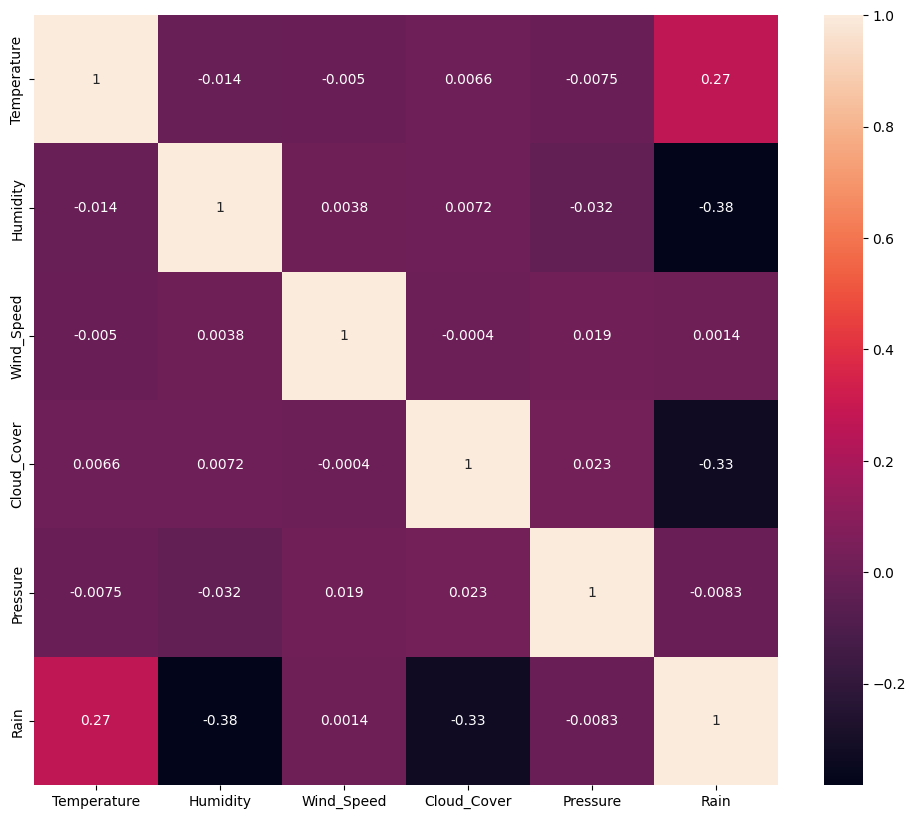

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df_mapped.corr(numeric_only = True), annot=True)
plt.show()

### Разделение набора данных

In [20]:
df_balanced = df_mapped.groupby('Rain').apply(lambda x: x.sample(df_mapped['Rain'].value_counts().min())).reset_index(drop=True)
df_balanced['Rain'].value_counts()

C:\Temp\ipykernel_9812\271926448.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_mapped.groupby('Rain').apply(lambda x: x.sample(df_mapped['Rain'].value_counts().min())).reset_index(drop=True)


Rain
0    314
1    314
Name: count, dtype: int64

In [31]:
X = df_balanced.drop(['Rain'], axis=1)
y = df_balanced['Rain']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (628, 5) | y shape: (628,) 


In [32]:
import scipy.stats as stats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=15, stratify=y)

In [33]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=10000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  # print(cv_results)
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.884510 (0.039545)
LDA: 0.872588 (0.035385)
KNN: 0.928235 (0.028614)
CART: 0.998000 (0.006000)
NB: 0.952196 (0.030919)
SVC: 0.559765 (0.013396)


In [34]:
sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.9365079365079365
sk LDA prediction: [1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0]
sk transformed features
[[-2.09081574 -2.11260766 -2.50205547 -1.96666548 -2.32150736]]


In [36]:
sk_lda = DecisionTreeClassifier()
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 1.0
sk LDA prediction: [1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0]
sk transformed features
[[-2.09081574 -2.11260766 -2.50205547 -1.96666548 -2.32150736]]


In [27]:
df_balanced.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,12.972924,93.289174,10.009874,57.019802,1016.072168,0
1,19.282174,91.622535,6.777989,57.482544,1048.631892,0
2,17.611710,93.350052,3.355312,56.821748,983.425376,0
3,23.488415,97.525779,8.502469,57.047338,1010.583702,0
4,23.109495,71.495390,2.300561,93.821627,999.849004,0


<Axes: title={'center': 'LDA surface with original features'}>

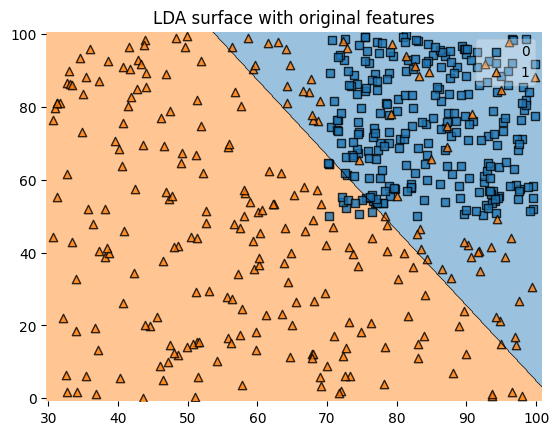

In [28]:
from mlxtend.plotting import plot_decision_regions

y_s = y_train
X_2d= X_train[['Humidity',	'Cloud_Cover']].values

y_2d = y_s.values

sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'LDA surface with original features'}>

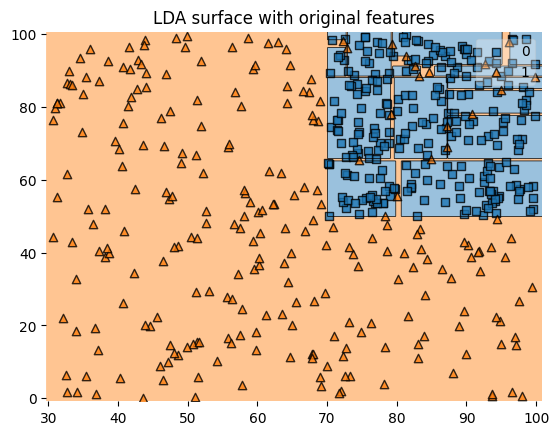

In [29]:
from mlxtend.plotting import plot_decision_regions

y_s = y_train
X_2d= X_train[['Humidity',	'Cloud_Cover']].values

y_2d = y_s.values

sk_lda1 = DecisionTreeClassifier()
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)